# Matplotlib란?
---

Matplotlib는 python의 시각화 라이브러리입니다.

오늘은 MATLAB과 유사하게 동작하는 Matplotlib의 pyplot 모듈을 알아보기 위해 Matplotlib 공식 홈페이지의 [Pyplot tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)을 진행해보겠습니다.

우선 필요한 라이브러리를 import 합니다.

In [1]:
import matplotlib.pyplot as plt

pyplot에서는 매우 간단하게 시각화를 할 수 있습니다.

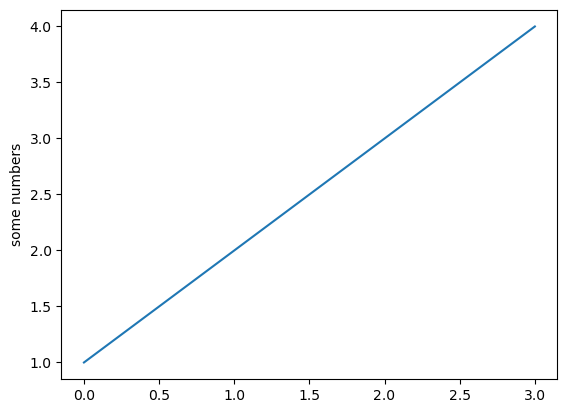

In [2]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

단일 array를 제공하면 이를 y값이라고 생각하고 자동으로 x값으로 index를 생성합니다. index는 0부터 시작하므로 x 값으로 [0, 1, 2, 3] 이 생성되는 것입니다.

x와 y값을 직접 지정해주려면 다음과 같이 입력합니다.

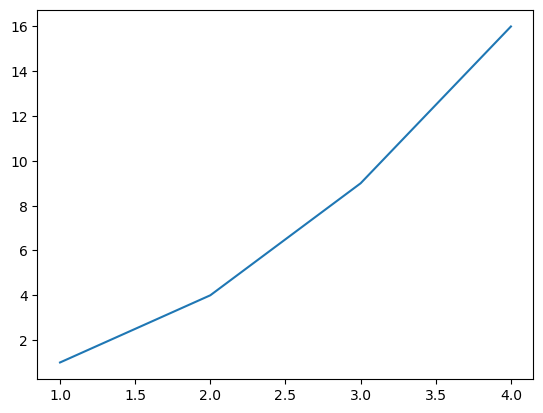

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

## Formatting the style of your plot
---

plot()의 세 번째 인자로 plot의 색상과 선의 유형을 나타내는 문자열 형식의 인수가 있습니다.

axis()는 x축과 y축의 최소, 최댓값들을 [xmin, xmax, ymin, ymax] 형식으로 지정해 줄 수 있습니다.

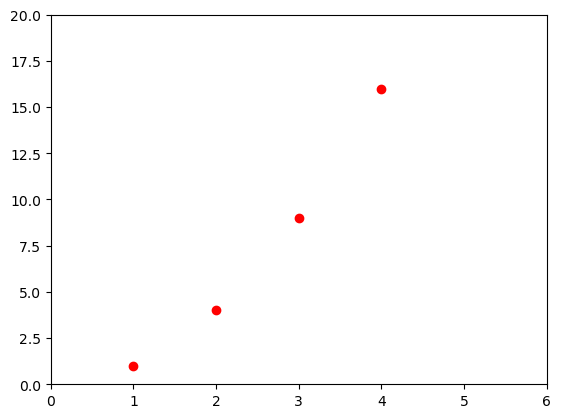

In [4]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

numpy array를 plot 할 수도 있습니다.

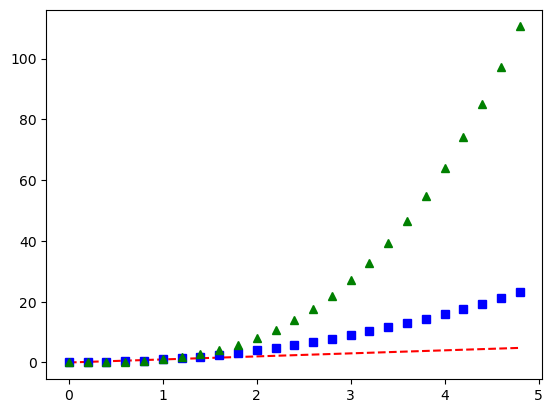

In [5]:
import numpy as np

t = np.arange(0., 5., 0.2)

plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

# Plotting with keyword strings
---

data의 키워드로 그래프를 그릴 수 있습니다.

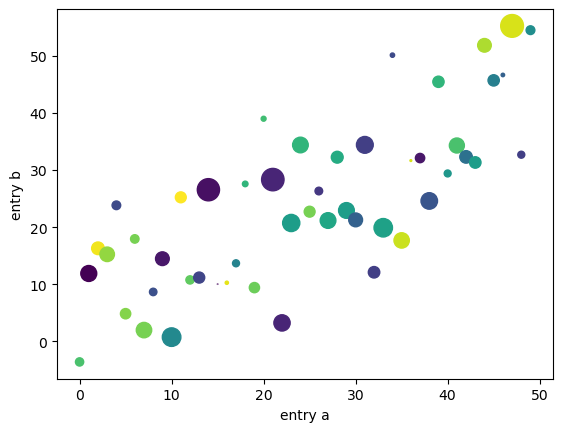

In [6]:
import pandas as pd

data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data) # c = color, s = size
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

# Plotting with categorical variables
---

범주형 변수를 사용해 여러가지 그래프를 그릴 수도 있습니다.

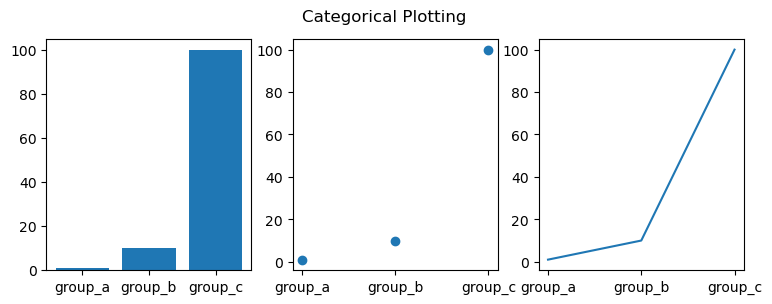

In [7]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

# Controlling line properties
---

선의 속성을 설정하는 방법은 여러가지가 있습니다.

In [8]:
x = [1,2,3,4]
y = [2,4,8,16]

인수를 통한 방법입니다.

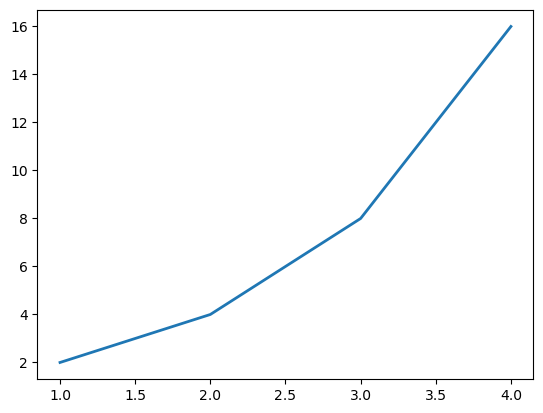

In [9]:
plt.plot(x, y, linewidth=2.0)

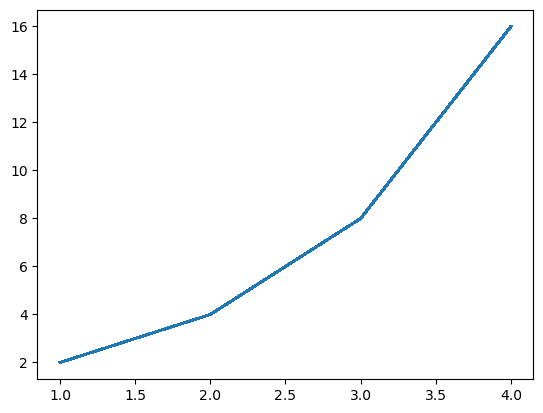

In [10]:
line, = plt.plot(x, y, '-')
line.set_antialiased(False) # turn off antialiasing

setp()를 사용하여 스타일을 지정할 수도 있습니다.

[None, None, None, None]

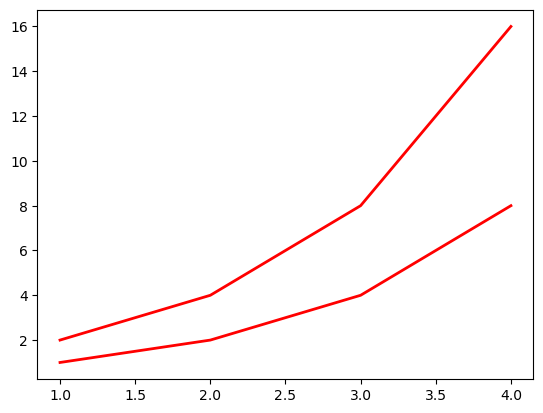

In [11]:
x1 = [1,2,3,4]
y1 = [2,4,8,16]
x2 = [1,2,3,4]
y2 = [1,2,4,8]

lines = plt.plot(x1, y1, x2, y2)
# use keyword arguments
plt.setp(lines, color='r', linewidth=2.0)
# or MATLAB style string value pairs
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

설정 가능한 속성은 여러가지가 있습니다. 속성을 확인하려면 setp()함수를 활용합니다.

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

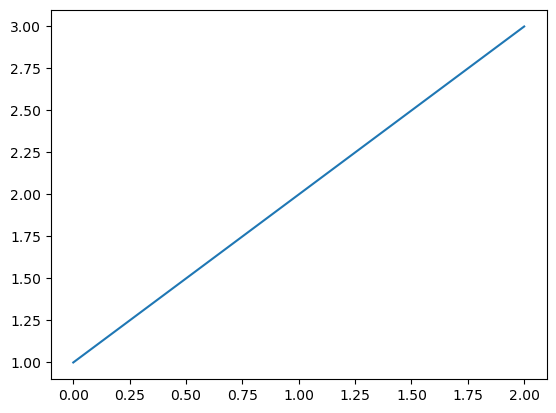

In [12]:
lines = plt.plot([1, 2, 3])

plt.setp(lines)

# Working with multiple figures and axes
---

여러 그래프를 한 화면에 동시에 그리고 싶다면, figure()와 subplot()을 이용합니다.

1. 우선 figure()로 빈 화면을 생성합니다.
2. subplot()으로 실제 데이터가 그려지는 공간을 생성합니다.
3. 마지막으로 plot()으로 그래프를 생성합니다.

subplot()의 인자는 x개의 rows와 x개의 columns중의 x번째 그래프 라는 의미입니다.

예를들어 subplot(211)이면 2개의 rows와 1개의 columns중 첫 번째 그래프라는 뜻입니다.

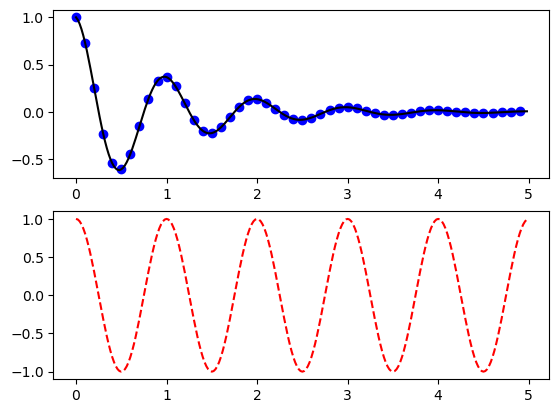

In [13]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

figure()에 순서를 지정할 수 있습니다. 아래 예시에서는 figure(1)이 먼저 완료되었지만, figure(2)가 완료된 후에 다시 수정되었으므로, figure(2)를 먼저 표시합니다.

Text(0.5, 1.0, 'Easy as 1, 2, 3')

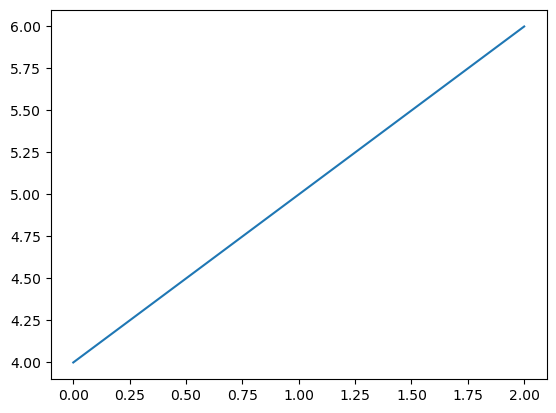

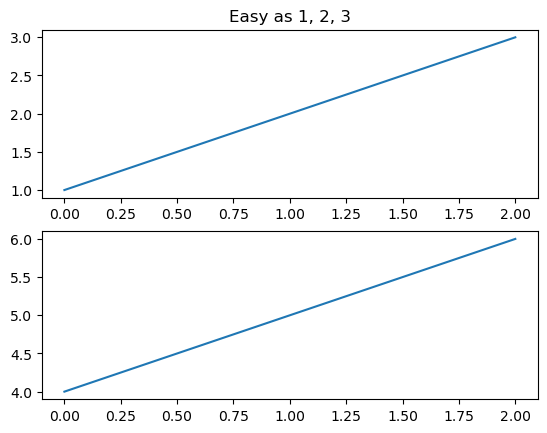

In [14]:
import matplotlib.pyplot as plt

plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot() by default

plt.figure(1)                # first figure current;
                             # subplot(212) still current
plt.subplot(211)             # make subplot(211) in the first figure
                             # current
plt.title('Easy as 1, 2, 3') # subplot 211 title

# Working with text
---

text()로 원하는 위치에 텍스트를 추가할 수 있으며, xlabel(), ylabel(), title() 등으로 x, y축의 설명과 제목을 표시할 수 있습니다.

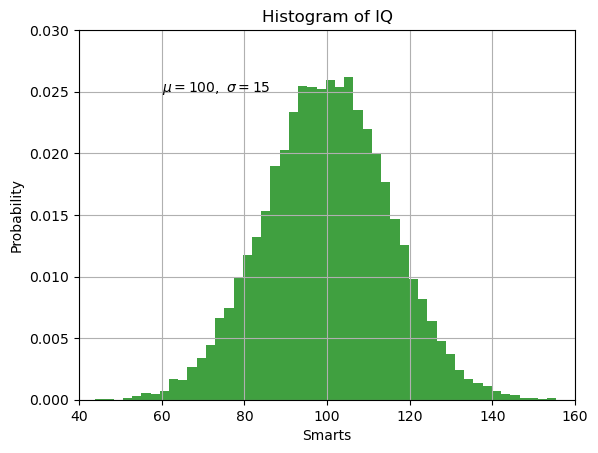

In [15]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

텍스트에도 인자나 setp()함수로 스타일을 지정할 수 있습니다.

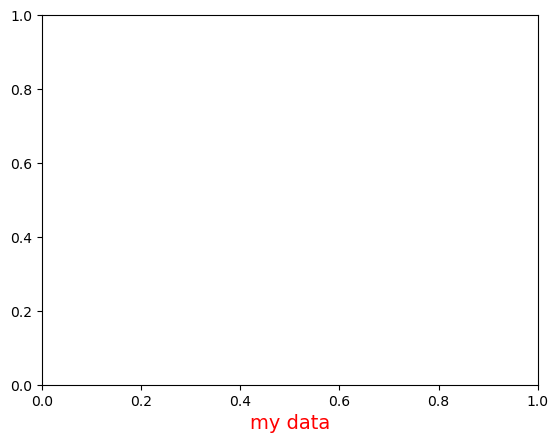

In [16]:
t = plt.xlabel('my data', fontsize=14, color='red')

## Using mathematical expressions in text
---

텍스트에 수학적인 표현을 사용할 수 있습니다.

Text(0.5, 1.0, '$\\sigma_i=15$')

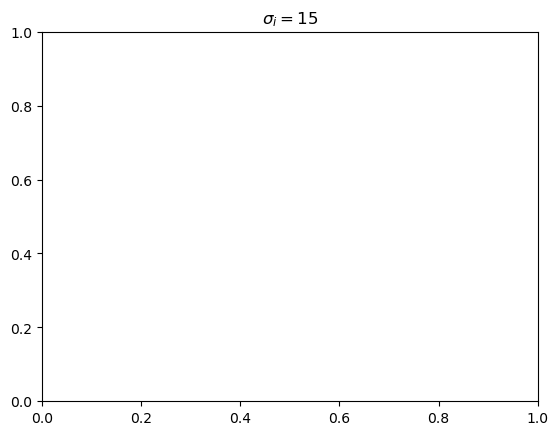

In [17]:
plt.title(r'$\sigma_i=15$')

## Annotating text
---

annotate()함수로 주석을 달 수도 있습니다.

xy인자로 주석을 표시할 위치를 지정해주고 xytext인자로 텍스트가 표시될 위치를 지정해줍니다.

아래 예제에서는 xy가 화살표의 끝 부분 위치를 나타냅니다

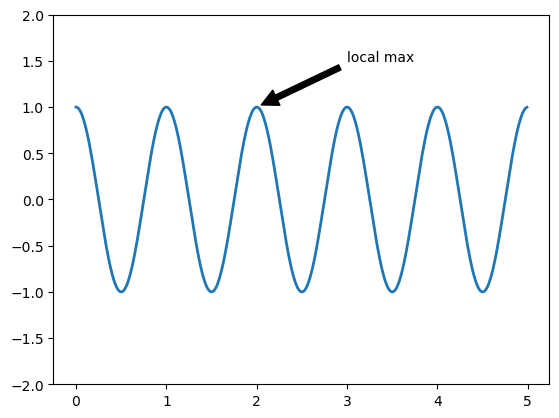

In [18]:
ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

# Logarithmic and other nonlinear axes
---

pyplot에서는 로그 스케일도 지원합니다.

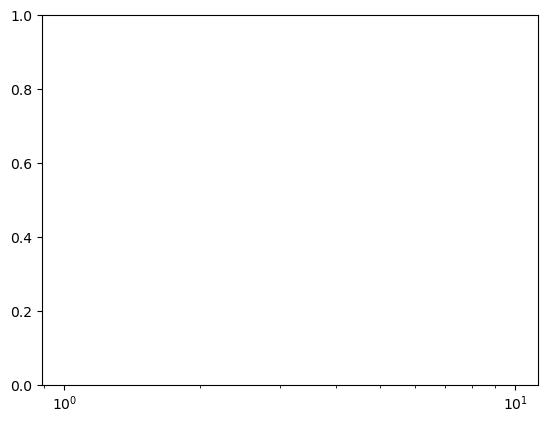

In [19]:
plt.xscale('log')

동일한 데이터를 사용하지만 y축의 scale이 다른 예제입니다.

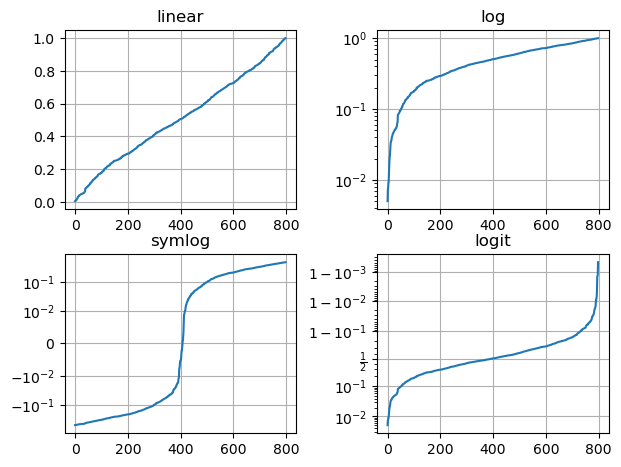

In [20]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

# 참고자료
---

- https://matplotlib.org/stable/tutorials/introductory/pyplot.html#